In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
import glob
from PIL import Image
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings

In [33]:
names = ['thickness', 'UO cell size', 'UO cell shape', 'adhesion', 'SE cell size',
        'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class']
df = pd.read_csv('datasets/breast-cancer.csv', names=names, delimiter=',')
filtered = df.loc[df['nuclei'] != '?'] # getting rid of troublesome parameter :P
print(filtered.shape)
filtered = filtered.astype(int)
# preparing data
data_df = filtered.iloc[:, :9]
class_list = filtered.iloc[:, 9].tolist()
# colors = ['blue' if cl == 2 else 'red' for cl in class_list]
colors = []
for class_gene in class_list:
    if class_gene == 2:
        colors.append('blue')
    else:
        colors.append('red')

(683, 10)


In [37]:
def perform_pca(data, number_of_components):
    # performing pca
    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe

def perform_kernel_pca(data, number_of_components):
    # performing kernel pca    
    kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
    components = kpca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe

def perform_mds(data, number_of_components):
    # performing mds
    #MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, 
    #eps=0.001, n_jobs=None, random_state=None, dissimilarity=’euclidean’)[source]
    mds = MDS(n_components=number_of_components)
    components = mds.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe
    
def perform_isomap(data, number_of_components, number_of_neighbors):
    iso = Isomap(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = iso.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe

def perform_lle(data, number_of_components, number_of_neighbors):
    lle = LLE(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = lle.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe

In [38]:
def display_data(data, method_num=1, num_of_neighbors=5):
    if method_num == 1:
        components_dataframe = perform_pca(data, 2)
    elif method_num == 2:
        components_dataframe = perform_kernel_pca(data, 2)
    elif method_num == 3:
        components_dataframe = perform_mds(data, 2)
    elif method_num == 4:
        components_dataframe = perform_isomap(data, 2, num_of_neighbors)
    else:
        components_dataframe = perform_lle(data, 2, num_of_neighbors)
    plt.scatter(components_dataframe[0], components_dataframe[1], s=3)
    plt.show()
    return

def display_data_with_colors(data, colors, method_num=1, num_of_neighbors=5):
    if method_num == 1:
        components_dataframe = perform_pca(data, 2)
    elif method_num == 2:
        components_dataframe = perform_kernel_pca(data, 2)
    elif method_num == 3:
        components_dataframe = perform_mds(data, 2)
    elif method_num == 4:
        components_dataframe = perform_isomap(data, 2, num_of_neighbors)
    else:
        components_dataframe = perform_lle(data, 2, num_of_neighbors)
    plt.scatter(components_dataframe[0], components_dataframe[1], c=colors, s=3)
    plt.show()
    return

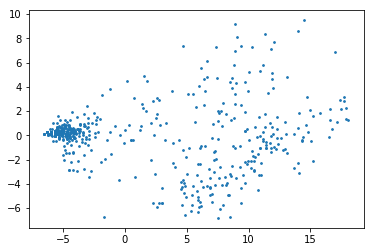

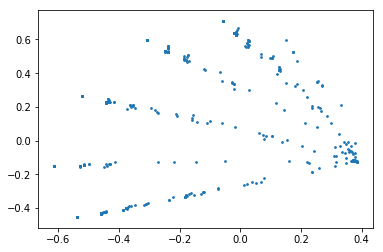

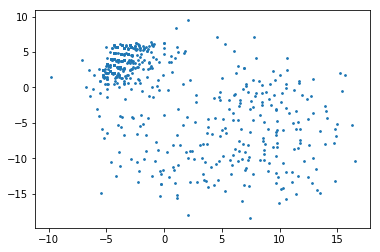

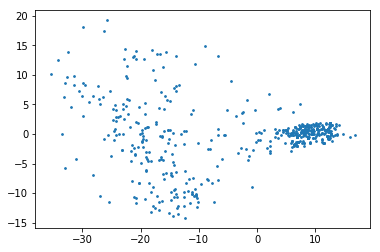

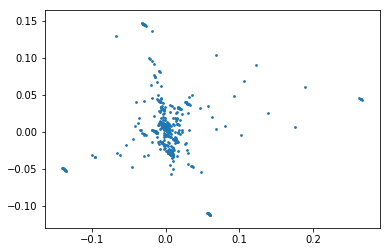

In [39]:
display_data(data_df,method_num=1) #pca
display_data(data_df,method_num=2) #kernel pca
display_data(data_df,method_num=3) #mds
display_data(data_df,method_num=4) #isomap
display_data(data_df,method_num=5) #lle

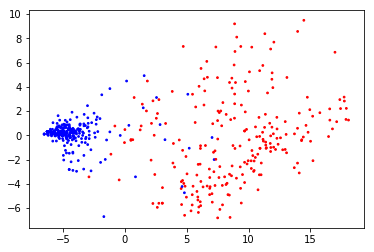

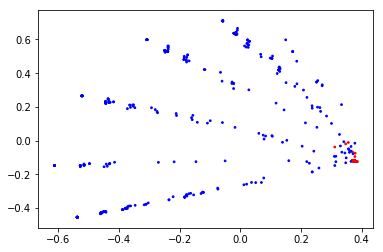

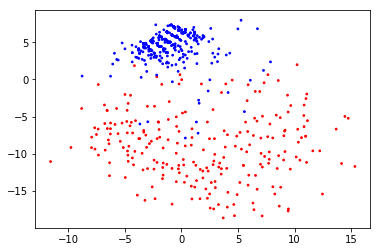

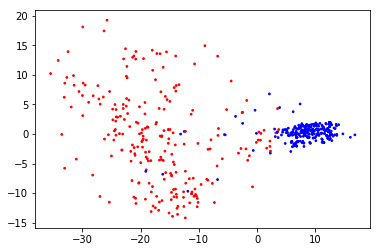

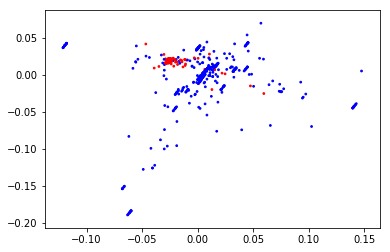

In [40]:
display_data_with_colors(data_df,colors,method_num=1) #pca
display_data_with_colors(data_df,colors,method_num=2) #kernel pca
display_data_with_colors(data_df,colors,method_num=3) #mds
display_data_with_colors(data_df,colors,method_num=4) #isomap
display_data_with_colors(data_df,colors,method_num=5) #lle

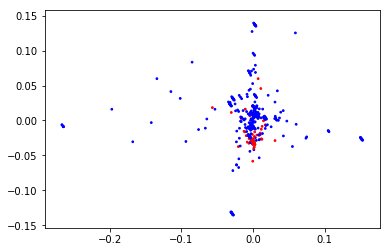

In [46]:
display_data_with_colors(data_df,colors,method_num=5) #lle

In [47]:
def display_3d_data_with_colors(data, colors,method_num=1, num_of_neighbors=5):
    if method_num == 1:
        components_dataframe = perform_pca(data, 3)
    elif method_num == 2:
        components_dataframe = perform_kernel_pca(data, 3)
    elif method_num == 3:
        components_dataframe = perform_mds(data, 3)
    elif method_num == 4:
        components_dataframe = perform_isomap(data, 3, num_of_neighbors)
    else:
        components_dataframe = perform_lle(data, 3, num_of_neighbors)
    ax = plt.axes(projection='3d')
    ax.scatter3D(components_dataframe[0], components_dataframe[1], components_dataframe[2], c=colors, s=3);
    plt.show()
    return

<IPython.core.display.Javascript object>


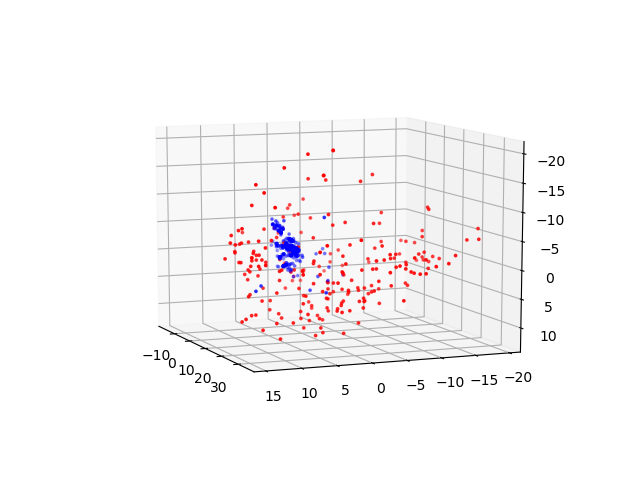

In [52]:
%matplotlib notebook

display_3d_data_with_colors(data_df, colors,method_num=4)